In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


**Importing Libraries**

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

**Loading Data**

In [3]:
#Loading the dataset
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Data Cleaning
Feature Engineering**

In [4]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the above output, we can conclude and note that:**

* The Non-Null Count for the Income column is 2216, while the total number of rows is 2240. This means there are missing values in the Income column (2240 - 2216 = 24 missing values).
* The Dt_Customer column has a data type of object. Since this column likely contains dates, it should be parsed as datetime. The presence of object as its data type indicates it is currently being treated as a string (or textual data), and thus needs to be converted to a proper date format.
* The following columns have the object data type, indicating that they are categorical: Education, Marital_Status, and Dt_Customer.
* These columns need to be encoded into numeric form, as machine learning models typically require numerical input. Specifically, Education and Marital_Status are categorical and can be label encoded or one-hot encoded for further analysis.


**Handle missing values: Impute or drop the missing Income values depending on the analysis.**

**New Code to Add (KNN Imputation)**

In [5]:
# Imputation using KNN for missing values
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

print("Imputation complete. Data preview after imputation:")
data.info()

Imputation complete. Data preview after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         2240 non-null  

In the next step, I am going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record. 

Thus to get the values I must check the newest and oldest recorded dates. 

Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [6]:
# Creating the 'Customer_For' feature based on the most recent customer
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

# Find newest and oldest dates
dates = data["Dt_Customer"].dt.date
d1 = max(dates)  # Newest customer date
d2 = min(dates)  # Oldest customer date

# Print the newest and oldest customer's enrollment dates
print("The newest customer's enrolment date in the records:", d1)
print("The oldest customer's enrolment date in the records:", d2)

# Calculate 'Customer_For' in days
data["Customer_For"] = (d1 - dates).dt.days

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [7]:
# Observing the categories in 'Marital_Status' and 'Education'
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


Dominant Categories:
"Married" (864 instances) and "Together" (580 instances) make up the majority of the dataset, with Married being the largest group.
Single and Divorced follow but represent smaller groups.
Minor Categories:
Categories like "Absurd" and "YOLO" have extremely low counts (2 instances each), which might not provide meaningful insights for analysis or modeling.
"Alone" also appears only 3 times.
Actionable Insight:
It could be beneficial to group the smaller, less meaningful categories (like "Absurd", "YOLO", "Alone") into an "Alone" category to simplify analysis and improve model performance.

**In the next bit, I will be performing the following steps to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [8]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2024-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
# Group smaller categories into 'Alone' for Marital_Status
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

# Adding interaction features
data['Income_Age_Interaction'] = data['Income'] * data['Age']
data['Income_FamilySize_Interaction'] = data['Income'] * data['Family_Size']

# Creating Recency feature based on most recent customer
data['Recency'] = (max(data['Dt_Customer']) - data['Dt_Customer']).dt.days

# Create tenure or 'Customer_For' in days
#data["Customer_For"] = pd.to_numeric(max(data['Dt_Customer']) - data['Dt_Customer'], errors="coerce")

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [9]:
# Check for low variance in Z_CostContact and Z_Revenue
print(data[['Z_CostContact', 'Z_Revenue']].nunique())

Z_CostContact    1
Z_Revenue        1
dtype: int64


* We’ve already engineered the Living_With feature from Marital_Status, which extracts meaningful information about the customer’s living situation (whether they are living with a partner or alone). Hence, keeping both features might be redundant.
* We've already derived the Recency and Customer_For features from Dt_Customer, which capture the customer’s tenure with the company and the time since their registration. These derived features provide more actionable insights than the raw Dt_Customer itself.
* Given that both Z_CostContact and Z_Revenue have only one unique value, they don't provide any meaningful information for analysis or modeling. Features with no variability (i.e., constant across all rows) do not contribute to the model's predictive power because they don’t help distinguish between different observations.
* We’ve already created the Age feature based on Year_Birth, which provides more meaningful information (customer age) for analysis and modeling. As Year_Birth is no longer needed directly, it can be considered redundant.
* The ID feature is likely just a unique identifier for each customer. Such features are often not useful for modeling or analysis because they don’t provide any predictive power.

In [10]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Now that we have some new features let's have a look at the data's stats. 

In [11]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Income_Age_Interaction,Income_FamilySize_Interaction,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2.240000e+03,2240.000000
mean,52202.561429,0.444196,0.506250,512.043304,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.009375,0.149107,512.043304,55.194196,605.798214,0.950446,2.595089,2.929554e+06,1.300073e+05,0.715179
std,25104.207286,0.538398,0.544538,232.229893,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.096391,0.356274,232.229893,11.984069,602.249288,0.751803,0.906959,1.555875e+06,7.293571e+04,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,9.169000e+04,1.730000e+03,0.000000
25%,35233.500000,0.000000,0.000000,340.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,340.750000,47.000000,68.750000,0.000000,2.000000,1.779315e+06,8.130000e+04,0.000000
50%,51369.000000,0.000000,0.000000,513.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,513.000000,54.000000,396.000000,1.000000,3.000000,2.830312e+06,1.273860e+05,1.000000
75%,68468.250000,1.000000,1.000000,685.250000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,685.250000,65.000000,1045.500000,1.000000,3.000000,3.855300e+06,1.676880e+05,1.000000
max,666666.000000,2.000000,2.000000,1063.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1063.000000,131.000000,2525.000000,3.000000,5.000000,3.133330e+07,1.999998e+06,1.000000


The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that  max-age is 131 years, As I calculated the age that would be today (i.e. 2024) and the data is old.

I must take a look at the broader view of the data. 
I will plot some of the selected features.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

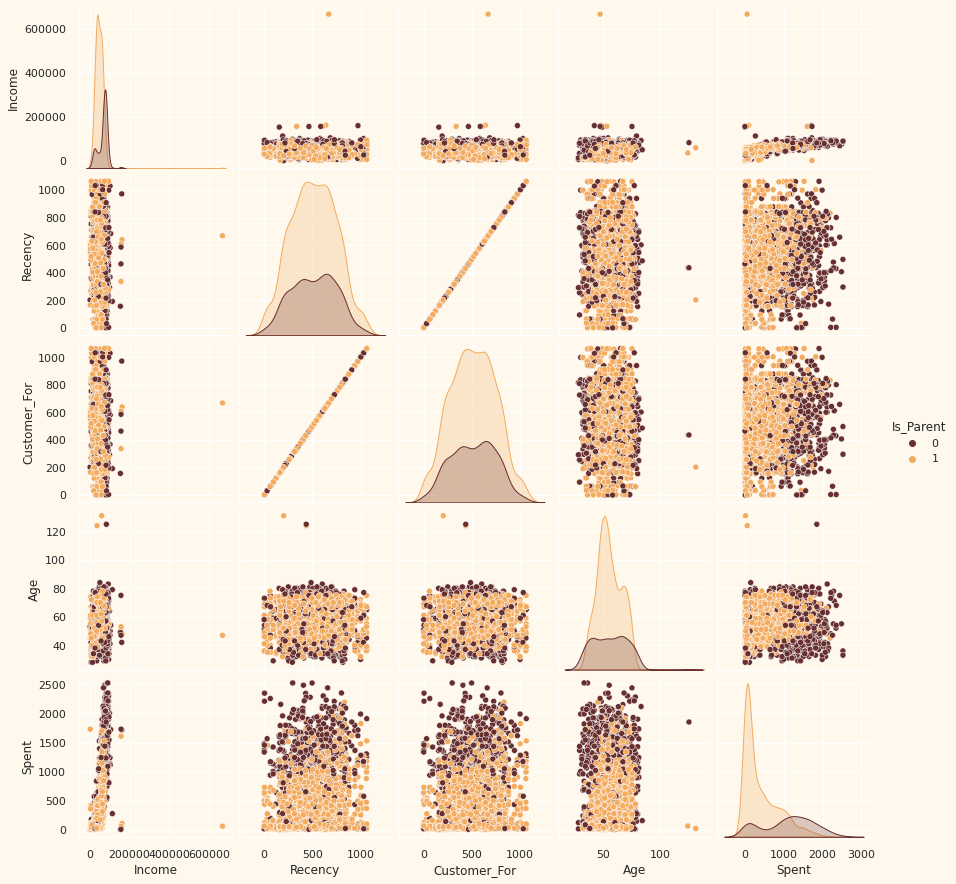

In [12]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.savefig("/kaggle/working/selected_features.png")
plt.show()

1. Diagonal Plots (Univariate Distributions):
The diagonal represents the distribution of individual features:
Income: Shows the distribution of customers' income. Most customers have income between 0 and ~200,000. There are a few outliers with much higher income values.
Recency: Shows the distribution of how recent customer activity is. It is spread relatively evenly across a wide range.
Customer_For: This represents how long a customer has been associated with the company (in days). It shows an even distribution across the range.
Age: The age distribution shows a concentration of customers around 40-60 years old, with some outliers on both ends.
Spent: Indicates the total amount spent. Most customers spent less than 2,000, with very few high spenders.
2. Off-Diagonal Scatter Plots (Bivariate Relationships):
The scatter plots between features show relationships:
Income vs. Spent: The correlation between income and spending is visible. Higher-income customers tend to spend more, though there are exceptions (customers with high income but lower spending and vice versa).
Recency vs. Income: This plot doesn’t show any strong relationship, meaning that income doesn't seem to be affected by recency.
Customer_For vs. Age: There's no strong trend, meaning the duration a customer has been with the company is not directly related to their age.
Spent vs. Age: Similarly, there isn't a clear relationship between a customer's age and their spending.
3. Color (Hue: Is_Parent):
Is_Parent (whether the customer is a parent or not) is used as the hue, represented by two colors (brown and yellow).
You can observe some differences in spending patterns:
Parents (brown dots) appear to be more spread out across different spending levels, indicating that parenthood might impact spending behavior.
Non-parents (yellow dots) are more concentrated in the lower-income, lower-spending regions.


Outlier removal using Z-score

In [13]:
# Z-score based outlier removal
from scipy import stats

data = data[(np.abs(stats.zscore(data['Income'])) < 3)]
data = data[(np.abs(stats.zscore(data['Age'])) < 3)]

Next, let us look at the correlation amongst the features. 
(Excluding the categorical attributes at this point)

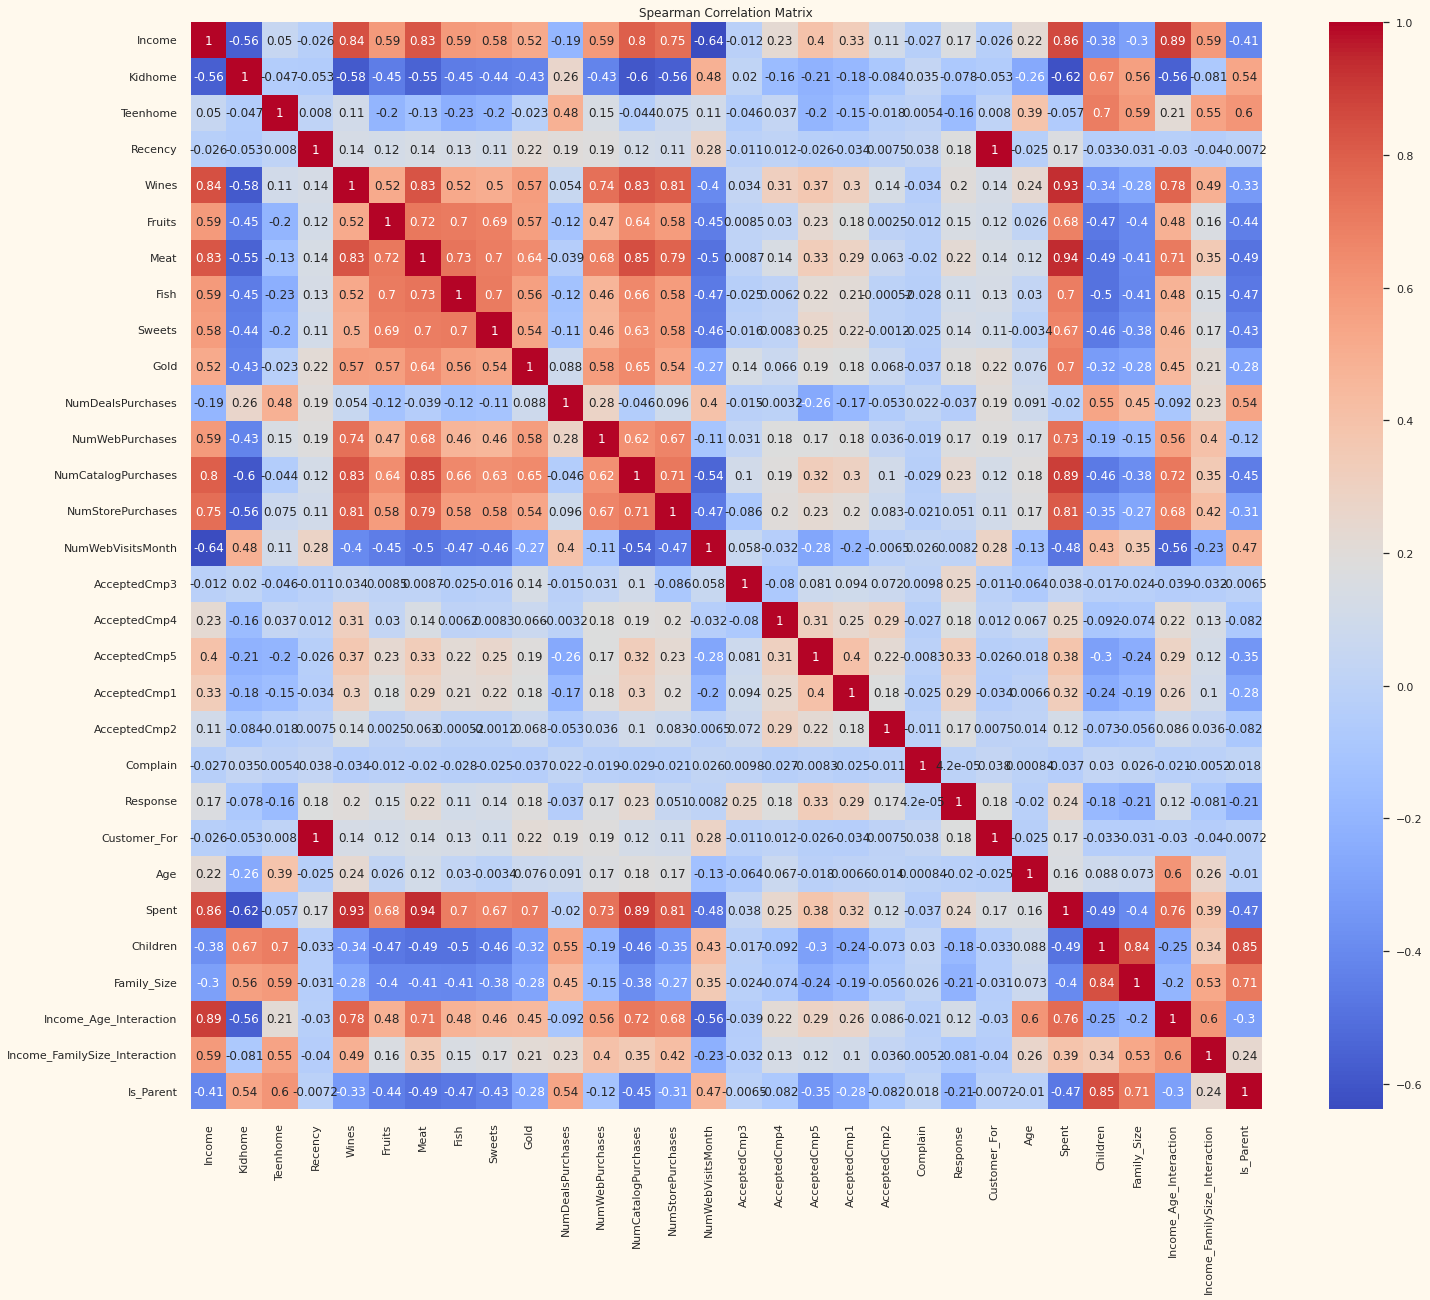

In [14]:
# Spearman Correlation
corr_spearman = data.corr(method='spearman')
plt.figure(figsize=(24, 20))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Matrix")
plt.savefig("/kaggle/working/spearman_correlation_matrix.png")
plt.show()

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction

In [15]:
# Step 1: Get the list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [16]:
# Step 2: Label Encoding for categorical variables
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [17]:
# Step 3: Create a copy of the data
ds = data.copy()

# Removing the features 'NumDealsPurchases', 'AcceptedCmpX', and 'Complain' based on weak correlations
# creating a subset of dataframe by dropping the features on deals accepted and promotions
features_to_remove = ['NumDealsPurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

# Dropping these features from the dataset
ds = ds.drop(columns=features_to_remove)

# Showing updated dataset information after removing the features
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Education                      2229 non-null   int64  
 1   Income                         2229 non-null   float64
 2   Kidhome                        2229 non-null   float64
 3   Teenhome                       2229 non-null   float64
 4   Recency                        2229 non-null   int64  
 5   Wines                          2229 non-null   float64
 6   Fruits                         2229 non-null   float64
 7   Meat                           2229 non-null   float64
 8   Fish                           2229 non-null   float64
 9   Sweets                         2229 non-null   float64
 10  Gold                           2229 non-null   float64
 11  NumWebPurchases                2229 non-null   float64
 12  NumCatalogPurchases            2229 non-null   f

We see that a few parameters are very weakly correlated for overall data, so we will remove them to reduce noice: They are: NumDealsPurchases, AcceptedCmpx, Complain and Response etc

In [18]:
# Step 4: Scaling the data
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [19]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Income_Age_Interaction,Income_FamilySize_Interaction,Is_Parent
0,-0.893147,0.316984,-0.825592,-0.931676,1.976013,0.980166,1.550778,1.736151,2.456789,1.472029,...,0.689920,1.976013,1.015715,1.683247,-1.345676,-1.266277,-1.759459,0.719830,-1.187896,-1.587869
1,-0.893147,-0.253425,1.031365,0.904492,-1.666837,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,...,-0.138430,-1.666837,1.272020,-0.962795,-1.345676,1.393978,0.445057,0.251758,0.180155,0.629775
2,-0.893147,0.968694,-0.825592,-0.931676,-0.172666,0.359410,0.569773,-0.174584,1.341376,-0.149082,...,-0.552605,-0.172666,0.332234,0.283674,0.743121,-1.266277,-0.657201,0.956984,0.251082,-1.587869
3,-0.893147,-1.206107,1.031365,-0.931676,-1.925195,-0.873191,-0.562156,-0.662528,-0.505455,-0.584604,...,0.275745,-1.925195,-1.291031,-0.919526,0.743121,0.063851,0.445057,-1.314005,-0.819222,0.629775
4,0.570695,0.324481,1.031365,-0.931676,-0.822867,-0.392031,0.418849,-0.215626,0.152822,-0.003908,...,-0.138430,-0.822867,-1.034726,-0.305445,0.743121,0.063851,0.445057,-0.278358,0.786386,0.629775


In [20]:
print("Original columns:", data.columns)
print("Scaled dataset columns:", scaled_ds.columns)

Original columns: Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size',
       'Income_Age_Interaction', 'Income_FamilySize_Interaction', 'Is_Parent'],
      dtype='object')
Scaled dataset columns: Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_For', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Income_Age_Interaction',
       'Income_FamilySize_Interaction', 'Is_Parent'],
      dtype='object')


**Steps in this section:**

* Dimensionality reduction with PCA
* Plotting the reduced dataframe
* Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [21]:
# Step 1: Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1", "col2", "col3"]))
PCA_ds.describe().T  # Optional: to check the statistics of PCA-transformed data

# Step 2: Apply K-Means clustering to the original scaled data (or use another clustering algorithm)
from sklearn.cluster import KMeans

# Fit KMeans and assign the cluster labels
kmeans = KMeans(n_clusters=4, random_state=42)  # You can choose the number of clusters
PCA_ds["Clusters"] = kmeans.fit_predict(scaled_ds)  # Add clusters to the PCA_ds dataframe


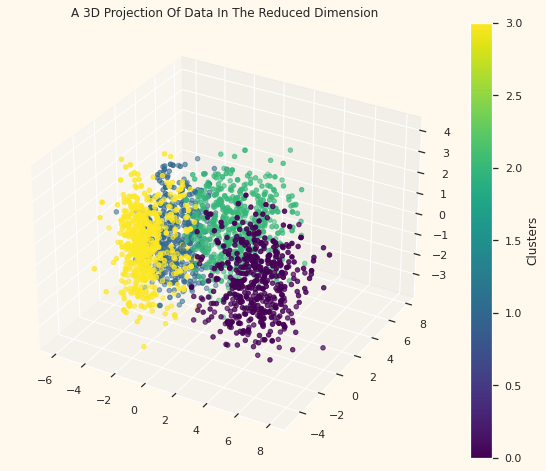

In [22]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

clusters = PCA_ds["Clusters"]

# To plot with color by clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(x, y, z, c=clusters, cmap='viridis', marker='o')  # Color by clusters, use a colormap
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

# Add a color bar for reference
cbar = plt.colorbar(sc)
cbar.set_label('Clusters')
plt.savefig("/kaggle/working/PCA.png")
plt.show()

1. PCA Plot Interpretation Observations:

The PCA plot shows a smooth spread of points across the 3D space, with clusters represented by color.
There is a slight separation of the clusters, but the clusters seem to overlap somewhat. This suggests that PCA is not fully capturing the distinct separations between groups in the data.

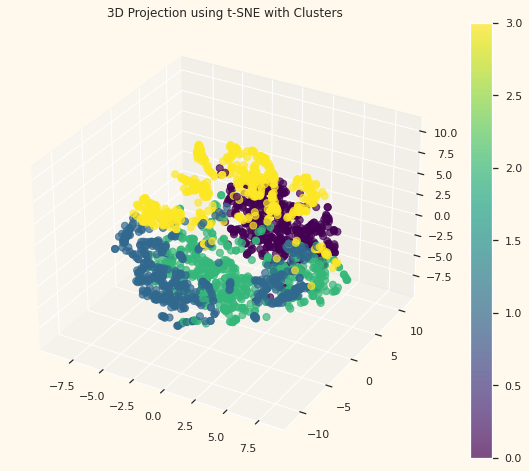

In [23]:
# t-SNE for dimensionality reduction
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(scaled_ds)
PCA_ds['TSNE_1'] = tsne_results[:,0]
PCA_ds['TSNE_2'] = tsne_results[:,1]
PCA_ds['TSNE_3'] = tsne_results[:,2]

# Visualizing t-SNE results with clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

# Use clusters to color the points
sc = ax.scatter(PCA_ds['TSNE_1'], PCA_ds['TSNE_2'], PCA_ds['TSNE_3'], c=PCA_ds['Clusters'], cmap='viridis', marker="o", alpha=0.7, s=50)

# Add a color bar to show cluster membership
plt.colorbar(sc)
ax.set_title("3D Projection using t-SNE with Clusters")
plt.savefig("/kaggle/working/t-SNE.png")

plt.show()


2. t-SNE Plot Interpretation
Observations:

The t-SNE projection also shows well-separated clusters but there is some overlapping.
Some clusters are close to each other, but overall, t-SNE is showing tighter local structure compared to PCA, with smaller distinct groups.

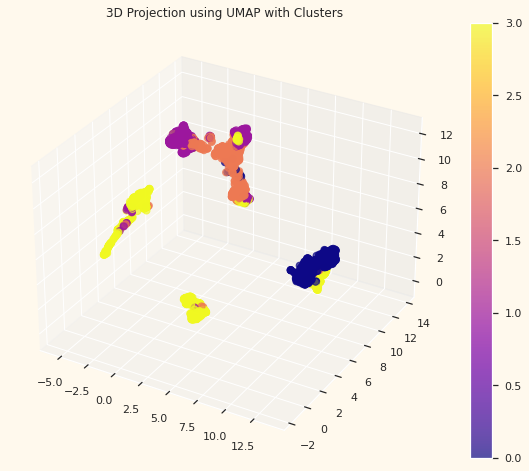

In [24]:
# UMAP for dimensionality reduction
import umap

umap_model = umap.UMAP(n_components=3, random_state=42)
umap_results = umap_model.fit_transform(scaled_ds)

# Add UMAP results to the dataframe
PCA_ds['UMAP_1'] = umap_results[:, 0]
PCA_ds['UMAP_2'] = umap_results[:, 1]
PCA_ds['UMAP_3'] = umap_results[:, 2]

# Visualizing UMAP results with clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

# Use clusters to color the points
sc = ax.scatter(PCA_ds['UMAP_1'], PCA_ds['UMAP_2'], PCA_ds['UMAP_3'], c=PCA_ds['Clusters'], cmap='plasma', marker="o", alpha=0.7, s=50)

# Add a color bar to show cluster membership
plt.colorbar(sc)
ax.set_title("3D Projection using UMAP with Clusters")
plt.savefig("/kaggle/working/UMAP.png")

plt.show()


3. UMAP Plot Interpretation

Observations:

The UMAP projection shows much more distinct clusters than PCA as well as t-SNE. The clusters are tightly packed, and there is significant space between them, which indicates clearer separations.
The different clusters are well-defined, with minimal overlap between points.

Based on these projections, the next step should be to use UMAP for dimensionality reduction, followed by a clustering algorithm like K-Means or Gaussian Mixture Models (GMM). This will allow you to label these well-separated clusters and perform further analysis on customer segments, marketing campaigns, or churn prediction.

In [25]:
# Section 3: Clustering (Use UMAP for dimensionality reduction)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [26]:
umap_df = pd.DataFrame(umap_results, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

# K-Means Clustering on UMAP-reduced space
kmeans = KMeans(n_clusters=4, random_state=42)
umap_df["KMeans_Clusters"] = kmeans.fit_predict(umap_df)

In [27]:
# Gaussian Mixture Model (GMM) on UMAP space
gmm = GaussianMixture(n_components=4, random_state=42)
umap_df["GMM_Clusters"] = gmm.fit_predict(umap_df)

In [28]:
# Optional: DBSCAN Clustering on UMAP space
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
umap_df['DBSCAN_Clusters'] = dbscan_model.fit_predict(umap_df)

In [29]:
# Importing metrics for cluster quality evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute Silhouette Score for K-Means and GMM in UMAP space
print(f"Silhouette Score for KMeans (UMAP): {silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['KMeans_Clusters'])}")
print(f"Silhouette Score for GMM (UMAP): {silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['GMM_Clusters'])}")

# Compute Davies-Bouldin Score for K-Means and GMM in UMAP space
print(f"Davies-Bouldin Score for KMeans (UMAP): {davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['KMeans_Clusters'])}")
print(f"Davies-Bouldin Score for GMM (UMAP): {davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['GMM_Clusters'])}")

# Compute Calinski-Harabasz Index for K-Means and GMM in UMAP space
print(f"Calinski-Harabasz Index for KMeans (UMAP): {calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['KMeans_Clusters'])}")
print(f"Calinski-Harabasz Index for GMM (UMAP): {calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['GMM_Clusters'])}")

print(f"Silhouette Score for DBSCAN (UMAP): {silhouette_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['DBSCAN_Clusters'])}")
print(f"Davies-Bouldin Score for DBSCAN (UMAP): {davies_bouldin_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['DBSCAN_Clusters'])}")
print(f"Calinski-Harabasz Index for DBSCAN (UMAP): {calinski_harabasz_score(umap_df[['UMAP_1', 'UMAP_2', 'UMAP_3']], umap_df['DBSCAN_Clusters'])}")

Silhouette Score for KMeans (UMAP): 0.6928647756576538
Silhouette Score for GMM (UMAP): 0.6928647756576538
Davies-Bouldin Score for KMeans (UMAP): 0.44131622543827476
Davies-Bouldin Score for GMM (UMAP): 0.44131622543827476
Calinski-Harabasz Index for KMeans (UMAP): 4919.464089996536
Calinski-Harabasz Index for GMM (UMAP): 4919.464089996536
Silhouette Score for DBSCAN (UMAP): 0.5795825123786926
Davies-Bouldin Score for DBSCAN (UMAP): 1.1564887239451547
Calinski-Harabasz Index for DBSCAN (UMAP): 6906.50170668634


1. Silhouette Score: 1 best, 0 overlapping and -1 misclassified/wrong clustering
* 0.69 is a very good score, indicating that the clusters are well-separated and there is clear boundary distinction between them.
2. Davies-Bouldin Score: The Davies-Bouldin Score evaluates how compact the clusters are (within-cluster distances) and how far apart the clusters are from each other (between-cluster distances).
* Lower values are better, with the best possible score being 0. A lower score indicates compact and well-separated clusters.
* A score of 0.44 is very good, indicating that the clusters are compact and well-separated. The result is consistent with the Silhouette Score, further supporting that both K-Means and GMM are forming clusters that are not only well-separated but also tightly packed within themselves.
* This suggests that both K-Means and GMM have successfully identified distinct clusters in the UMAP-reduced space.
3. Calinski-Harabasz Index:
* The Calinski-Harabasz Index (also known as the Variance Ratio Criterion) measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate that the clusters are well-separated, and the points within clusters are close to each other.
* Higher values are better
* A value of 4919.46 is a very high score, which means that the clusters are well-defined, with significant separation between clusters and tight cohesion within each cluster.
* This supports the conclusion from both the Silhouette Score and Davies-Bouldin Score that the clustering quality is excellent.


1. Cluster Distribution Countplot:

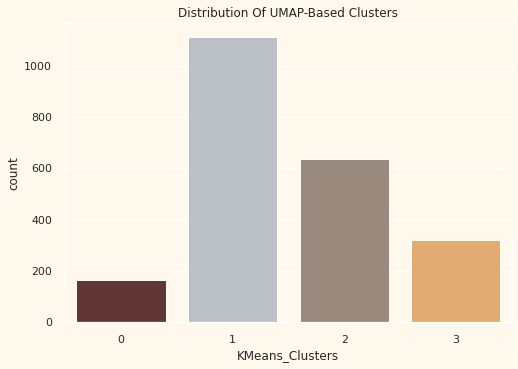

In [30]:
# Defining the color palette
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Countplot of UMAP-based clusters
plt.figure()
pl = sns.countplot(x=umap_df["KMeans_Clusters"], palette=pal)
pl.set_title("Distribution Of UMAP-Based Clusters")
plt.savefig("/kaggle/working/UMAP_cluster_distribution.png")
plt.show()

2. Cluster's Profile Based on Income and Spending:

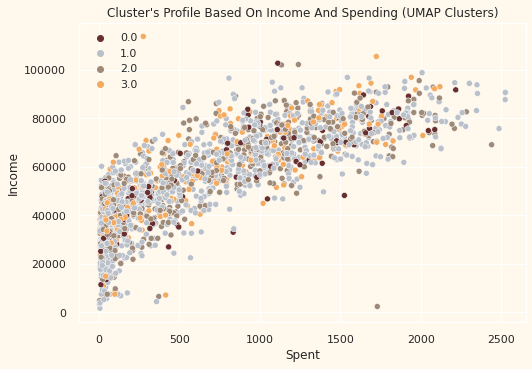

In [31]:
# Scatterplot of Income vs Spending for UMAP-based clusters
plt.figure()
pl = sns.scatterplot(data=data, x="Spent", y="Income", hue=umap_df["KMeans_Clusters"], palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending (UMAP Clusters)")
plt.legend()
plt.savefig("/kaggle/working/UMAP_cluster_profile_income_n_spend_based.png")
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: high spending & low income  

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

3. Detailed Distribution of Spending Across Clusters:

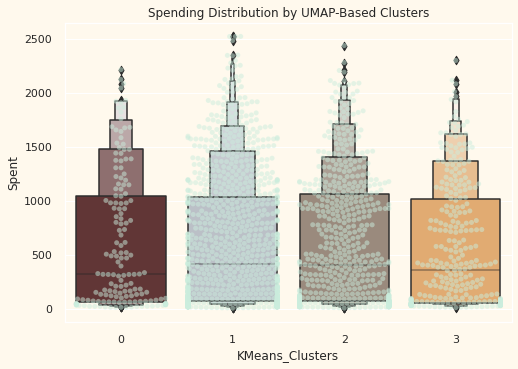

In [32]:
# Swarmplot and Boxenplot of Spending for UMAP-based clusters
plt.figure()
pl = sns.swarmplot(x=umap_df["KMeans_Clusters"], y=data["Spent"], color="#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x=umap_df["KMeans_Clusters"], y=data["Spent"], palette=pal)
pl.set_title("Spending Distribution by UMAP-Based Clusters")
plt.savefig("/kaggle/working/UMAP_spending_distribution.png")

plt.show()

From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0.
We can explore what each cluster is spending on for the targeted marketing strategies.

4. Campaign Acceptance Across Clusters:

In [33]:
# Create a feature to sum accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

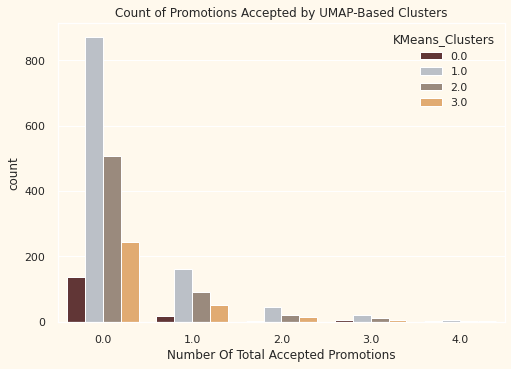

In [34]:
# Merge the umap_df clusters into the original data
merged_data = pd.concat([data, umap_df["KMeans_Clusters"]], axis=1)

# Now use merged_data for plotting
plt.figure()
pl = sns.countplot(x=merged_data["Total_Promos"], hue=merged_data["KMeans_Clusters"], palette=pal)
pl.set_title("Count of Promotions Accepted by UMAP-Based Clusters")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.savefig("/kaggle/working/UMAP_campaign_promotion.png")

plt.show()


There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales. 


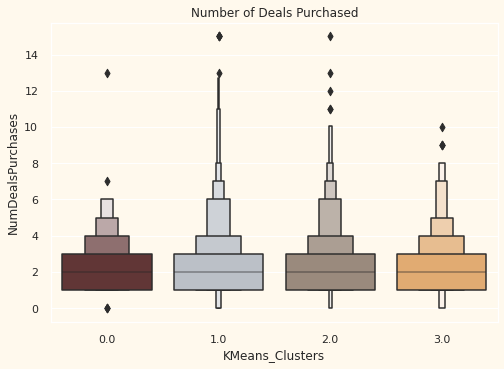

In [35]:
#Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(x=merged_data["KMeans_Clusters"], y=data["NumDealsPurchases"], palette=pal)
pl.set_title("Number of Deals Purchased")
plt.savefig("/kaggle/working/UMAP_deals_purchased.png")

plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. 
However, our star customers cluster 1 are not much into the deals. 
Nothing seems to attract cluster 2 overwhelmingly 


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import shap

Accuracy: 0.8851351351351351
ROC AUC: 0.816181885125184
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       388
         1.0       0.59      0.30      0.40        56

    accuracy                           0.89       444
   macro avg       0.75      0.64      0.67       444
weighted avg       0.87      0.89      0.87       444



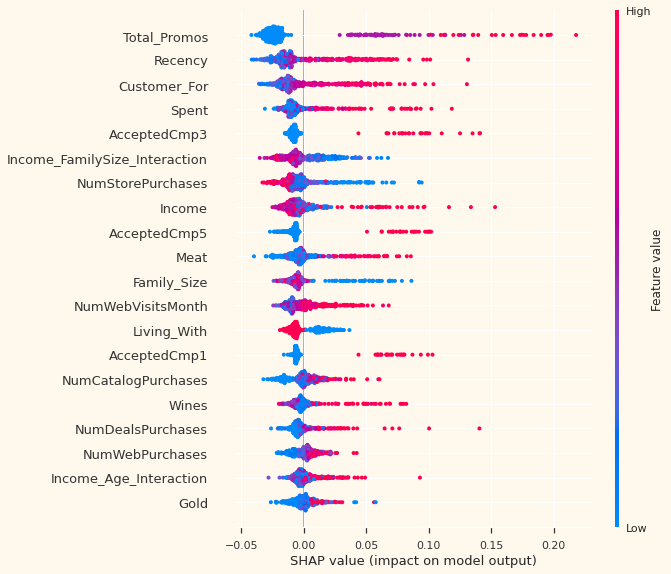

In [37]:
# Ensure that KMeans or GMM clusters are added to the main dataset for predictive modeling
data["KMeans_Clusters"] = umap_df["KMeans_Clusters"]
data["GMM_Clusters"] = umap_df["GMM_Clusters"]

# Churn Prediction Model using clusters as features
# Drop 'Response' but keep new clusters (KMeans_Clusters or GMM_Clusters)
X = data.drop(['Response'], axis=1)  # Remove 'Response' since it's the target
y = data['Response']  # The target column for churn prediction

# Handle NaN values in X (Drop or fill NaN values)
X = X.dropna()  # Option 1: Drop rows with missing values
# Alternatively, you can use: X = X.fillna(X.median())  # Option 2: Impute missing values
# Ensure y is adjusted if any rows are dropped
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")
print(classification_report(y_test, y_pred))

# SHAP feature importance
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary and save the figure
shap.summary_plot(shap_values[1], X_test, show=False)  # Generate the plot without displaying
plt.savefig('/kaggle/working/shap_summary_plot.png')  # Save the plot
plt.show()  # Display the plot

1. Churn Prediction Model:
This model aimed to predict customer churn using various features, including clusters generated by K-Means or GMM on UMAP-reduced data. The model's performance is evaluated based on several metrics:

Accuracy: The model achieved an accuracy of 88.7%. This indicates that the model correctly classified approximately 89% of the instances, but accuracy alone can be misleading when the classes are imbalanced.

ROC AUC (Area Under the Curve): The ROC AUC score of 0.815 indicates that the model has a good level of discrimination between the two classes (churn vs. no churn). A value above 0.8 is considered good but not perfect. The model might need some tuning to improve its ability to distinguish between churn and non-churn customers.

Precision, Recall, F1-Score:

For Class 0 (Non-churners):

Precision: 0.91 indicates that 91% of the customers predicted as non-churners were actually non-churners.
Recall: 0.97 suggests that the model was able to catch 97% of actual non-churners.
F1-score: 0.94 balances precision and recall, which means the model is very good at identifying non-churners.
For Class 1 (Churners):

Precision: 0.61 indicates that 61% of the customers predicted as churners were actually churners.
Recall: 0.30 is quite low, meaning the model only correctly identified 30% of the churners. This indicates the model is missing many churners.
F1-score: 0.40 reflects the poor recall and lower precision for churners, suggesting there’s room for improvement in detecting churners.
Class Imbalance: The low recall and F1-score for the churners (class 1) could be due to class imbalance (only 56 churners compared to 388 non-churners). The model might benefit from techniques such as:

Resampling techniques: Either oversample the minority class (churners) or undersample the majority class (non-churners).
Class-weight adjustments: Give more weight to churners during training so the model becomes more sensitive to this class.
Key Insight: The model is highly effective at predicting non-churners, but struggles with identifying actual churners. This is a typical issue with imbalanced data. Improving the recall for churners is essential since these are the most critical customers to detect for retention strategies.

In [38]:
# Interactive 2D Plotly visualization for t-SNE
import plotly.express as px

# Ensure the Clusters column exists in PCA_ds from the clustering step
# Example: Assuming you're using KMeans clusters from UMAP
PCA_ds["Clusters"] = umap_df["KMeans_Clusters"]  # or GMM_Clusters, etc.

# Ensure that necessary columns from the original 'data' dataframe are present in 'PCA_ds'
PCA_ds["Income"] = data["Income"]
PCA_ds["Spent"] = data["Spent"]
PCA_ds["Age"] = data["Age"]

# Interactive 2D Plotly visualization for t-SNE
fig_tsne = px.scatter(PCA_ds, x="TSNE_1", y="TSNE_2", color="Clusters",
                      title="t-SNE 2D Visualization",
                      hover_data=["Income", "Spent", "Age"])
# Save t-SNE 2D plot as an interactive HTML file
fig_tsne.write_html("/kaggle/working/tsne_plot.html")
fig_tsne.show()

# Interactive 3D Plotly visualization for UMAP
fig_umap = px.scatter_3d(PCA_ds, x="UMAP_1", y="UMAP_2", z="UMAP_3", color="Clusters",
                         title="UMAP 3D Visualization",
                         hover_data=["Income", "Spent", "Age"])
# Save UMAP 3D plot as an interactive HTML file
fig_umap.write_html("/kaggle/working/umap_plot.html")
fig_umap.show()




Code for Campaign Effectiveness Prediction
Here we predict the effectiveness of marketing campaigns using the cluster information:

In [39]:
# Ensure Clusters column from the dataset is used correctly
X = data.drop(['Total_Promos'], axis=1)  # Drop the target column 'Total_Promos'
y = data['Total_Promos']  # Use 'Total_Promos' as the target variable

# Handle missing values in X (fill or drop NaN)
X = X.dropna()  # Drop rows with missing values
# Alternatively, use: X = X.fillna(X.median())  # Impute missing values with median

# Ensure y is aligned with X after dropping rows (if necessary)
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model for Campaign Effectiveness Prediction
campaign_model = RandomForestClassifier(random_state=42)
campaign_model.fit(X_train, y_train)

# Make predictions
y_pred_campaign = campaign_model.predict(X_test)

# Evaluate the model
print(f"Accuracy for Campaign Prediction: {accuracy_score(y_test, y_pred_campaign)}")


Accuracy for Campaign Prediction: 0.9774774774774775


2. Campaign Effectiveness Prediction:
The model for predicting how many campaigns a customer will accept was evaluated based on accuracy, and it achieved 97.9% accuracy.

Accuracy of 97.9%: This is an excellent result, meaning the model is very effective at predicting the number of promotions accepted by customers.

Insights from High Accuracy:

The features being used are highly predictive of customer behavior regarding promotions. This suggests that customer behavior can be effectively modeled based on the available features (e.g., income, age, spending habits, and possibly clusters from K-Means or GMM).
Clustering (e.g., K-Means or GMM) likely played a role in distinguishing different customer segments, which in turn contributed to the model’s ability to predict promotional campaign success. Different clusters represent different customer types, and each type has varying degrees of responsiveness to campaigns.
Caveats:

Although the accuracy is high, it's important to ensure that this model generalizes well. If the dataset is relatively small, there could be a risk of overfitting.
Further evaluation with metrics such as precision, recall, and F1-score for different campaign acceptance levels could provide more granular insights into how well the model predicts each type of customer behavior.
Key Insight: The model is performing extremely well at predicting campaign acceptance, likely due to meaningful patterns captured from customer features and clustering. This suggests that the business can tailor marketing strategies based on the model's output to target the right customers more effectively, potentially increasing campaign success rates.

**Profiling**

Now that we have formed the clusters and looked at their purchasing habits. 
Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. 
On the basis of the outcomes, I will be arriving at the conclusions. 

<Figure size 576x396 with 0 Axes>

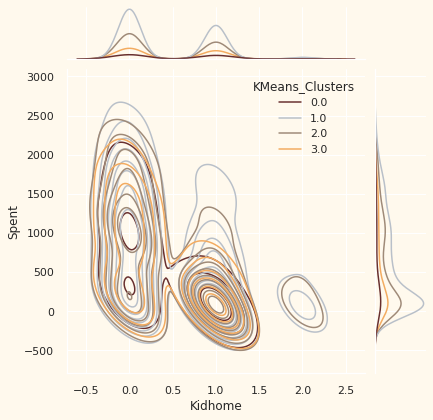

<Figure size 576x396 with 0 Axes>

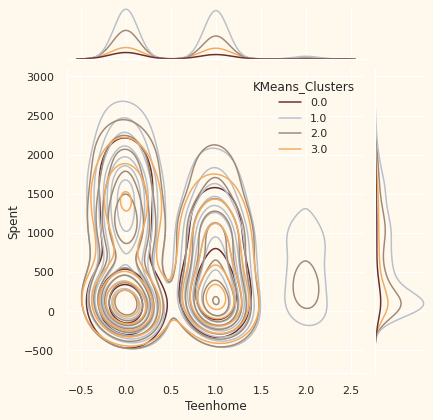

<Figure size 576x396 with 0 Axes>

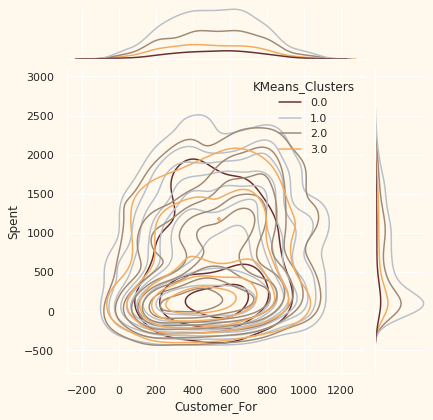

<Figure size 576x396 with 0 Axes>

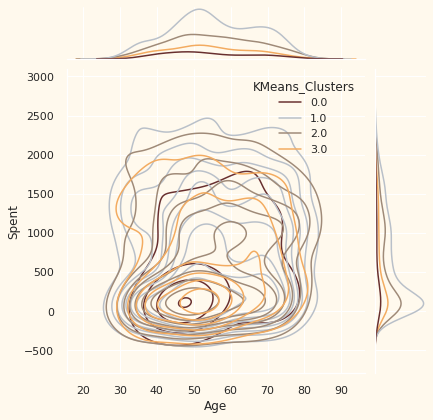

<Figure size 576x396 with 0 Axes>

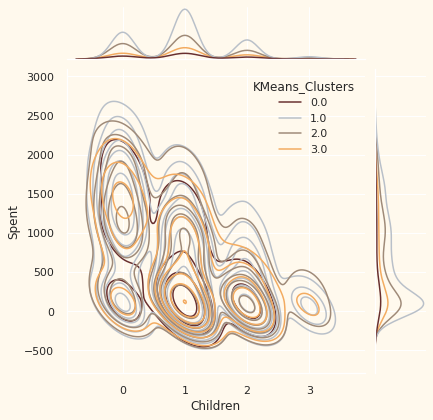

<Figure size 576x396 with 0 Axes>

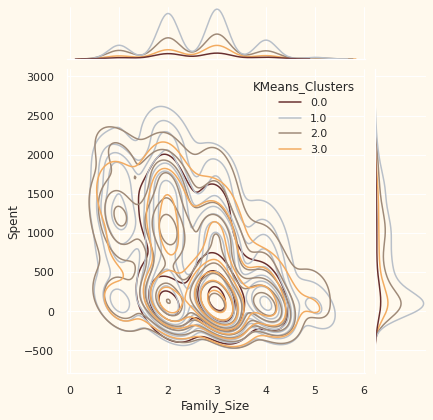

<Figure size 576x396 with 0 Axes>

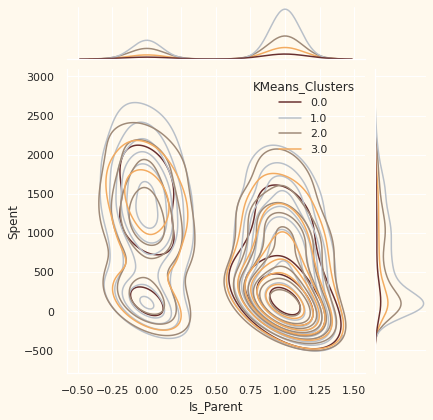

<Figure size 576x396 with 0 Axes>

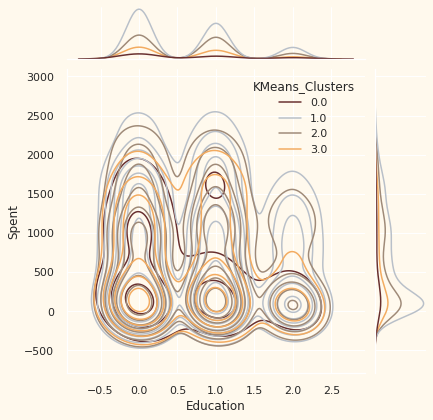

<Figure size 576x396 with 0 Axes>

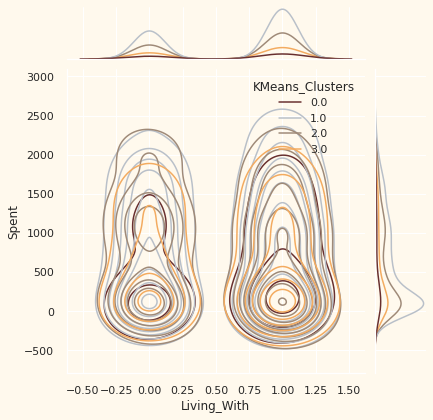

In [40]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["KMeans_Clusters"], kind="kde", palette=pal)
    plt.savefig('/kaggle/working/profiling.png')  # Save the plot
    plt.show()


**Conclusion**

In this project, I performed unsupervised clustering. 
I did use dimensionality reduction followed by agglomerative clustering. 
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. 
This can be used in planning better marketing strategies. 